# Hotel Booking Demand Dataset

> see [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand), [Github](
https://github.com/aaqibqadeer/Hotel-booking-demand)

In [119]:
import numpy as np
import pandas as pd
import datetime

## Dataset

In [2]:
hotel_bookings = pd.read_csv('datasets/hotel_bookings.csv')
hotel_bookings.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


### Size

In [4]:
# complete number of rows
print(hotel_bookings.index)
# RangeIndex(start=0, stop=119390, step=1)

# complete number of columns
print(len(hotel_bookings.columns))
# 32

RangeIndex(start=0, stop=119390, step=1)
32


### Missing Data

In [5]:
# only show rows that have missing values
hotel_bookings_nan = hotel_bookings[hotel_bookings.isna().any(axis=1)]
hotel_bookings_nan
# 119173 rows × 32 columns
# only 119390 - 119173 =  217 rows don't have missing entries

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


| | hotel | is_canceled | lead_time | arrival_date_year | arrival_date_month | arrival_date_week_number | arrival_date_day_of_month | stays_in_weekend_nights | stays_in_week_nights | adults | ... | deposit_type | agent | company | days_in_waiting_list | customer_type | adr | required_car_parking_spaces | total_of_special_requests | reservation_status | reservation_status_date |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Resort Hotel | 0 | 342 | 2015 | July | 27 | 1 | 0 | 0 | 2 | ... | No Deposit | NaN | NaN | 0 | Transient | 0.00 | 0 | 0 | Check-Out | 01-07-15 |
| 1 | Resort Hotel | 0 | 737 | 2015 | July | 27 | 1 | 0 | 0 | 2 | ... | No Deposit | NaN | NaN | 0 | Transient | 0.00 | 0 | 0 | Check-Out | 01-07-15 |
| 2 | Resort Hotel | 0 | 7 | 2015 | July | 27 | 1 | 0 | 1 | 1 | ... | No Deposit | NaN | NaN | 0 | Transient | 75.00 | 0 | 0 | Check-Out | 02-07-15 |
| 3 | Resort Hotel | 0 | 13 | 2015 | July | 27 | 1 | 0 | 1 | 1 | ... | No Deposit | 304.0 | NaN | 0 | Transient | 75.00 | 0 | 0 | Check-Out | 02-07-15 |
| 4 | Resort Hotel | 0 | 14 | 2015 | July | 27 | 1 | 0 | 2 | 2 | ... | No Deposit | 240.0 | NaN | 0 | Transient | 98.00 | 0 | 1 | Check-Out | 03-07-15 |
| ... |
| 119385 | City Hotel | 0 | 23 | 2017 | August | 35 | 30 | 2 | 5 | 2 | ... | No Deposit | 394.0 | NaN | 0 | Transient | 96.14 | 0 | 0 | Check-Out | 06-09-17 |
| 119386 | City Hotel | 0 | 102 | 2017 | August | 35 | 31 | 2 | 5 | 3 | ... | No Deposit | 9.0 | NaN | 0 | Transient | 225.43 | 0 | 2 | Check-Out | 07-09-17 |
| 119387 | City Hotel | 0 | 34 | 2017 | August | 35 | 31 | 2 | 5 | 2 | ... | No Deposit | 9.0 | NaN | 0 | Transient | 157.71 | 0 | 4 | Check-Out | 07-09-17 |
| 119388 | City Hotel | 0 | 109 | 2017 | August | 35 | 31 | 2 | 5 | 2 | ... | No Deposit | 89.0 | NaN | 0 | Transient | 104.40 | 0 | 0 | Check-Out | 07-09-17 |
| 119389 | City Hotel | 0 | 205 | 2017 | August | 35 | 29 | 2 | 7 | 2 | ... | No Deposit | 9.0 | NaN | 0 | Transient | 151.20 | 0 | 2 | Check-Out | 07-09-17 |

In [6]:
# which columns have the most missing entries
hotel_bookings.isna().sum()

# the columns company, agent and country have the most missing data:

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

|    |    |
| -- | -- |
| hotel | 0 |
| is_canceled | 0 |
| lead_time | 0 |
| arrival_date_year | 0 |
| arrival_date_month | 0 |
| arrival_date_week_number | 0 |
| arrival_date_day_of_month | 0 |
| stays_in_weekend_nights | 0 |
| stays_in_week_nights | 0 |
| adults | 0 |
| children | 4 |
| babies | 0 |
| meal | 0 |
| country | 488 |
| market_segment | 0 |
| distribution_channel | 0 |
| is_repeated_guest | 0 |
| previous_cancellations | 0 |
| previous_bookings_not_canceled | 0 |
| reserved_room_type | 0 |
| assigned_room_type | 0 |
| booking_changes | 0 |
| deposit_type | 0 |
| agent | 16340 |
| company | 112593 |
| days_in_waiting_list | 0 |
| customer_type | 0 |
| adr | 0 |
| required_car_parking_spaces | 0 |
| total_of_special_requests | 0 |
| reservation_status | 0 |
| reservation_status_date | 0 |
_dtype: int64_

In [12]:
# drop columns with missing data
hotel_bookings_dropped_nan = hotel_bookings.drop(['company', 'agent'], axis=1)
hotel_bookings_dropped_nan.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-15


In [13]:
hotel_bookings_dropped_nan[hotel_bookings_dropped_nan.isna().any(axis=1)]
# 4 rows × 29 columns
# only the 4 rows with missing data in the children column and 488 country column remain

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,15-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,15-02-16
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,20-07-16
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,22-07-16
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,13-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,10-04-17
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,10-04-17
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,10-04-17
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,A,0,No Deposit,0,Transient-Party,70.0,0,0,Check-Out,26-11-15


### Exploration

#### Data Columns

In [28]:
# what columns do we have
pd.Series(hotel_bookings.columns)

0                              hotel
1                        is_canceled
2                          lead_time
3                  arrival_date_year
4                 arrival_date_month
5           arrival_date_week_number
6          arrival_date_day_of_month
7            stays_in_weekend_nights
8               stays_in_week_nights
9                             adults
10                          children
11                            babies
12                              meal
13                           country
14                    market_segment
15              distribution_channel
16                 is_repeated_guest
17            previous_cancellations
18    previous_bookings_not_canceled
19                reserved_room_type
20                assigned_room_type
21                   booking_changes
22                      deposit_type
23                             agent
24                           company
25              days_in_waiting_list
26                     customer_type
2

|  |  |
| -- | -- |
| 0 | hotel |
| 1 | is_canceled |
| 2 | lead_time |
| 3 | arrival_date_year |
| 4 | arrival_date_month |
| 5 | arrival_date_week_number |
| 6 | arrival_date_day_of_month |
| 7 | stays_in_weekend_nights |
| 8 | stays_in_week_nights |
| 9 | adults |
| 10 | children |
| 11 | babies |
| 12 | meal |
| 13 | country |
| 14 | market_segment |
| 15 | distribution_channel |
| 16 | is_repeated_guest |
| 17 | previous_cancellations |
| 18 | previous_bookings_not_canceled |
| 19 | reserved_room_type |
| 20 | assigned_room_type |
| 21 | booking_changes |
| 22 | deposit_type |
| 23 | agent |
| 24 | company |
| 25 | days_in_waiting_list |
| 26 | customer_type |
| 27 | adr |
| 28 | required_car_parking_spaces |
| 29 | total_of_special_requests |
| 30 | reservation_status |
| 31 | reservation_status_date |
_dtype: object_

#### Top Countries

In [21]:
# top5 country codes
hotel_bookings_dropped_nan['country'].value_counts().head(5)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

|  |  |
| -- | -- |
| PRT | 48590 |
| GBR | 12129 |
| FRA | 10415 |
| ESP | 8568 |
| DEU | 7287 |
_Name: country, dtype: int64_

<AxesSubplot: >

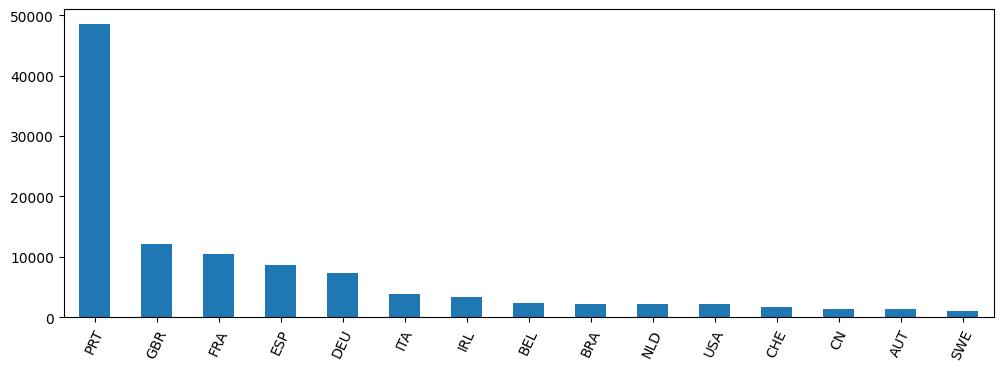

In [26]:
hotel_bookings_dropped_nan['country'].value_counts().head(15).plot.bar(figsize=(12,4),rot=65)

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_01.png)

#### Average Daily Rates

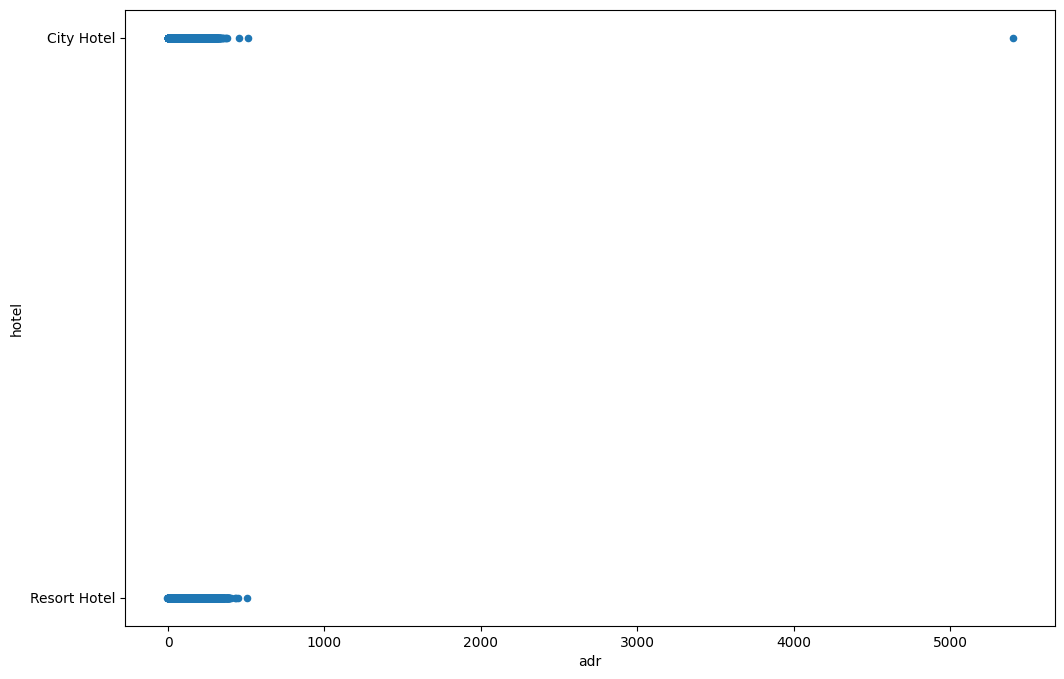

In [33]:
plot = hotel_bookings_dropped_nan.plot.scatter(
    figsize=(12,8),
    x='adr',
    y='hotel')

# there are only 2 hotels and all adr's are within 0-500$ with one outlier above 5000$

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_02.png)

In [38]:
# find outlier
hotel_bookings_dropped_nan.sort_values('adr', ascending=False).iloc[0]

hotel                                City Hotel
is_canceled                                   1
lead_time                                    35
arrival_date_year                          2016
arrival_date_month                        March
arrival_date_week_number                     13
arrival_date_day_of_month                    25
stays_in_weekend_nights                       0
stays_in_week_nights                          1
adults                                        2
children                                    0.0
babies                                        0
meal                                         BB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                            A
assigned_room_type                      

|    |    |
| -- | -- |
| hotel | City Hotel |
| is_canceled | 1 |
| lead_time | 35 |
| arrival_date_year | 2016 |
| arrival_date_month | March |
| arrival_date_week_number | 13 |
| arrival_date_day_of_month | 25 |
| stays_in_weekend_nights | 0 |
| stays_in_week_nights | 1 |
| adults | 2 |
| children | 0.0 |
| babies | 0 |
| meal | BB |
| country | PRT |
| market_segment | Offline TA/TO |
| distribution_channel | TA/TO |
| is_repeated_guest | 0 |
| previous_cancellations | 0 |
| previous_bookings_not_canceled | 0 |
| reserved_room_type | A |
| assigned_room_type | A |
| booking_changes | 1 |
| deposit_type | Non Refund |
| days_in_waiting_list | 0 |
| customer_type | Transient |
| adr | 5400.0 |
| required_car_parking_spaces | 0 |
| total_of_special_requests | 0 |
| reservation_status | Canceled |
| reservation_status_date | 19-02-16 |
_Name: 48515, dtype: object_

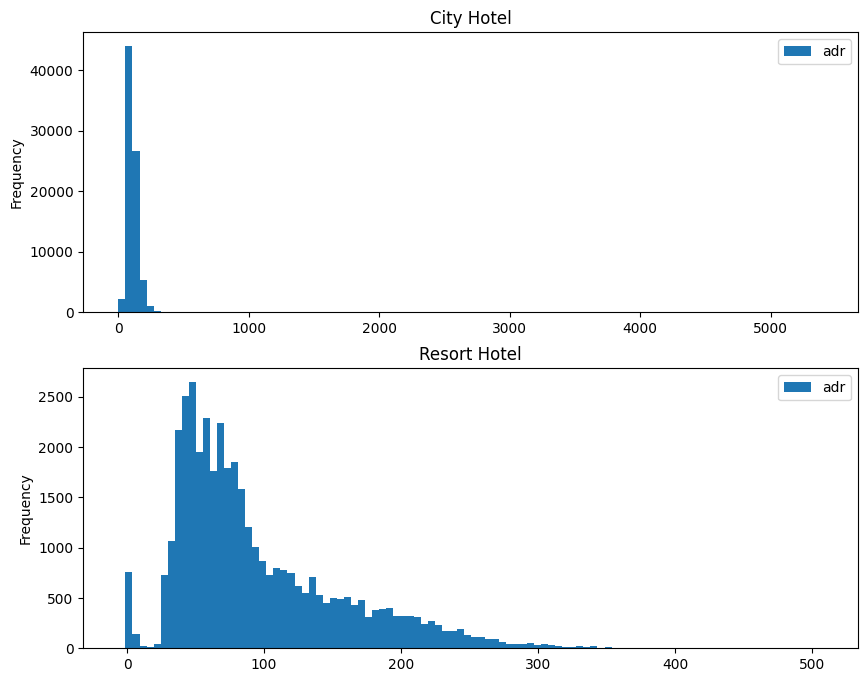

In [40]:
plot = hotel_bookings_dropped_nan.plot.hist(
    column=["adr"],
    by="hotel",
    bins=100,
    figsize=(10, 8)
)

# the outlier squeezes the first histogram and makes it hard to compare them

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_03.png)

In [46]:
# let's find the outlier iloc and drop the row
hotel_bookings_dropped_nan['adr'].idxmax()
# 48515

48515

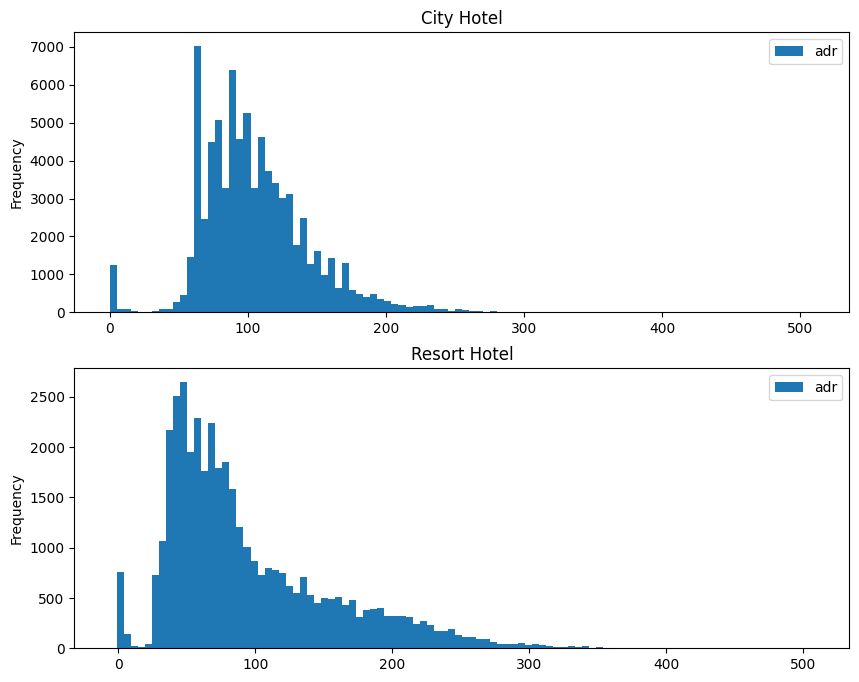

In [48]:
hotel_bookings_dropped_outlier = hotel_bookings_dropped_nan.drop(48515, axis=0)

plot = hotel_bookings_dropped_outlier.plot.hist(
    column=["adr"],
    by="hotel",
    bins=100,
    figsize=(10, 8)
)

# nice :)

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_04.png)

In [30]:
# calculate the average daily rate `adr` for a guest staying at each hotel
adr_by_hotel = hotel_bookings_dropped_nan.groupby('hotel').mean(numeric_only=True)['adr']
adr_by_hotel

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64

__Average Daily Rate__

|    |    |
| -- | -- |
| hotel |  |
| City Hotel | 105.304465 |
| Resort Hotel | 94.952930 |
_Name: adr, dtype: float64_

#### Average Stays

In [42]:
# how long do guest stay on average
hotel_bookings_dropped_nan['total_days'] = hotel_bookings_dropped_nan['stays_in_weekend_nights'] + hotel_bookings_dropped_nan['stays_in_week_nights']
hotel_bookings_dropped_nan['total_days'].head(5)

0    0
1    0
2    1
3    1
4    2
Name: total_days, dtype: int64

|    |    |
| -- | -- |
| 0 | 0 |
| 1 | 0 |
| 2 | 1 |
| 3 | 1 |
| 4 | 2 |
_Name: total\_days, dtype: int64_

In [45]:
average_stays = hotel_bookings_dropped_nan.groupby('hotel').mean(numeric_only=True).round(1)['total_days']
average_stays

# the average staying time is 3 and 4.3 days, respectively

hotel
City Hotel      3.0
Resort Hotel    4.3
Name: total_days, dtype: float64

|  hotel  |    |
| -- | -- |
| City Hotel | 3.0 |
| Resort Hotel | 4.3 |
_Name: total|_days, dtype: float64_

#### Average Cost per Stay

In [49]:
# given the # of days and average daily adr we can calculate the average total cost per stay
hotel_bookings_dropped_nan['total_cost'] = hotel_bookings_dropped_nan['total_days'] * hotel_bookings_dropped_nan['adr']
hotel_bookings_dropped_nan['total_cost'].head(5)

0      0.0
1      0.0
2     75.0
3     75.0
4    196.0
Name: total_cost, dtype: float64

|    |    |
| -- | -- |
| 0 | 0.0 |
| 1 | 0.0 |
| 2 | 75.0 |
| 3 | 75.0 |
| 4 | 196.0 |
_Name: total\_days, dtype: float64_

In [50]:
average_total_cost = hotel_bookings_dropped_nan.groupby('hotel').mean(numeric_only=True).round(2)['total_cost']
average_total_cost

hotel
City Hotel      318.66
Resort Hotel    435.45
Name: total_cost, dtype: float64

| hotel   |    |
| -- | -- |
| City Hotel | 318.66 |
| Resort Hotel | 435.45 |
_Name: total_days, dtype: float64_

#### Percentage of Returning Guest

In [54]:
# total number of bookings per hotel
hotel_bookings_dropped_nan.value_counts('hotel')

hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64

| hotel   |    |
| -- | -- |
| City Hotel | 79330 |
| Resort Hotel | 40060 |
_dtype: int64_

In [58]:
# select only city hotel
city_hotel_bookings = hotel_bookings_dropped_nan[hotel_bookings_dropped_nan['hotel'] == 'City Hotel']
city_hotel_bookings['hotel'].head(5)

40060    City Hotel
40061    City Hotel
40062    City Hotel
40063    City Hotel
40064    City Hotel
Name: hotel, dtype: object

|    |    |
| -- | -- |
| 40060 | City Hotel |
| 40061 | City Hotel |
| 40062 | City Hotel |
| 40063 | City Hotel |
| 40064 | City Hotel |
_Name: hotel, dtype: object_

In [60]:
# select only resort hotel
resort_hotel_bookings = hotel_bookings_dropped_nan[hotel_bookings_dropped_nan['hotel'] == 'Resort Hotel']
resort_hotel_bookings['hotel'].head(5)

0    Resort Hotel
1    Resort Hotel
2    Resort Hotel
3    Resort Hotel
4    Resort Hotel
Name: hotel, dtype: object

|    |    |
| -- | -- |
| 0 | Resort Hotel |
| 1 | Resort Hotel |
| 2 | Resort Hotel |
| 3 | Resort Hotel |
| 4 | Resort Hotel |
_Name: hotel, dtype: object_

In [63]:
returning_customer_city_hotel = sum(city_hotel_bookings['is_repeated_guest'] == 1)
returning_customer_city_hotel
# 2032

2032

In [69]:
total_customer_city_hotel = hotel_bookings_dropped_nan.value_counts('hotel')['City Hotel']
total_customer_city_hotel
# 79330

79330

In [68]:
percentage_returning_customer_city_hotel = (
    returning_customer_city_hotel * 100 / total_customer_city_hotel
)
percentage_returning_customer_city_hotel.round(2)
# 2.56%

2.56

In [78]:
returning_customer_resort_hotel = sum(resort_hotel_bookings['is_repeated_guest'] == 1)
total_customer_resort_hotel = hotel_bookings_dropped_nan.value_counts('hotel')['Resort Hotel']

percentage_returning_customer_resort_hotel = (
    returning_customer_resort_hotel * 100 / total_customer_resort_hotel
)
percentage_returning_customer_resort_hotel.round(2)
# 4.44%

4.44

In [79]:
# visualize
hotel_index = ['City Hotel', 'Resort Hotel']
booking_columns = ['Total Bookings', 'Returning Customer', 'Percentage']
data_array = [
    (
        total_customer_city_hotel,
        returning_customer_city_hotel,
        percentage_returning_customer_city_hotel.round(2)
    ),
    (
        total_customer_resort_hotel,
        returning_customer_resort_hotel,
        percentage_returning_customer_resort_hotel.round(2)
    )
]

return_customer_df = pd.DataFrame(data_array, hotel_index, booking_columns)
return_customer_df

,Total Bookings,Returning Customer,Percentage
City Hotel,79330,2032,2.56
Resort Hotel,40060,1778,4.44


| Hotel   |  Total Bookings  |  Returning Customer  | Percentage|
| -- | -- | -- | -- |
| City Hotel | 79330 | 2032 | 2.56 |
| Resort Hotel | 40060 | 1778 | 5.07 |

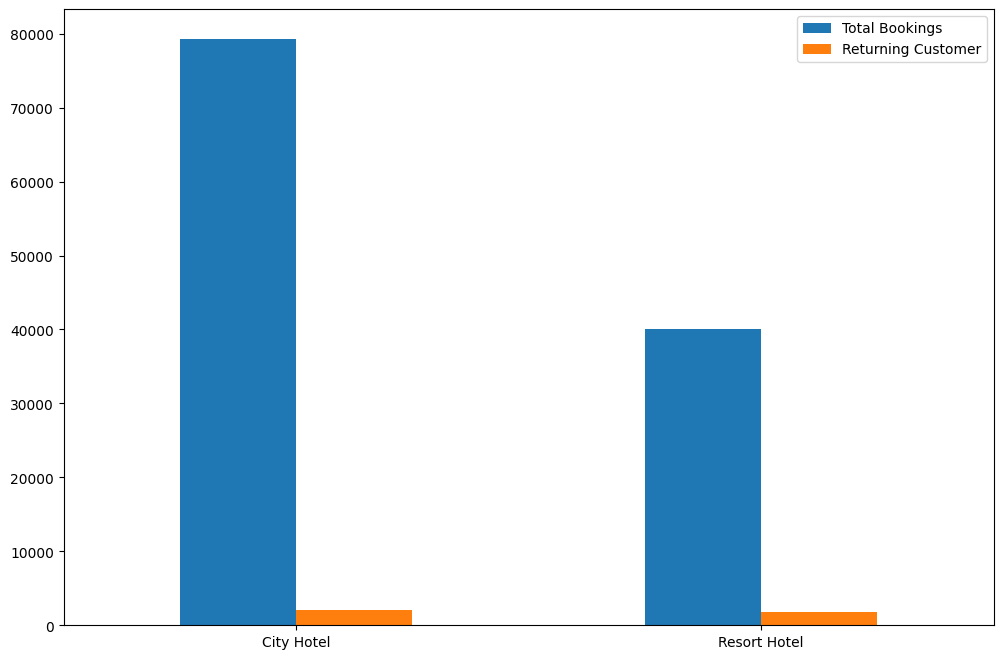

In [87]:
plot = return_customer_df[
    ['Total Bookings', 'Returning Customer']
].plot.bar(figsize=(12,8), rot=0)

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_05.png)

In [ ]:
arrival_date_year 	2016
arrival_date_month 	March
arrival_date_day_of_month 	25
Aug 27, 1989
pd.to_datetime(date_series)

In [89]:
city_hotel_bookings[[
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_day_of_month'
]].head(5)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
40060,2015,July,1
40061,2015,July,1
40062,2015,July,1
40063,2015,July,1
40064,2015,July,2


| | arrival_date_year | arrival_date_month | arrival_date_day_of_month |
| -- | -- | -- | -- |
| 40060 | 2015 | July | 1 |
| 40061 | 2015 | July | 1 |
| 40062 | 2015 | July | 1 |
| 40063 | 2015 | July | 1 |
| 40064 | 2015 | July | 2 |

#### Correlate Bookings to Day of the Week

In [97]:
city_hotel_bookings['datetime'] = (
    pd.to_datetime(
        city_hotel_bookings['arrival_date_month'] + ' ' + city_hotel_bookings['arrival_date_day_of_month'].astype(str) + ' , ' + city_hotel_bookings['arrival_date_year'].astype(str)
    )
)

city_hotel_bookings['datetime']

/tmp/ipykernel_64089/790920676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_bookings['datetime'] = (


40060    2015-07-01
40061    2015-07-01
40062    2015-07-01
40063    2015-07-01
40064    2015-07-02
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: datetime, Length: 79330, dtype: datetime64[ns]

|  |  |
| -- | -- |
| 40060 | 2015-07-01 |
| 40061 | 2015-07-01 |
| 40062 | 2015-07-01 |
| 40063 | 2015-07-01 |
| 40064 | 2015-07-02 |
| ... |
| 119385 | 2017-08-30 |
| 119386 | 2017-08-31 |
| 119387 | 2017-08-31 |
| 119388 | 2017-08-31 |
| 119389 | 2017-08-29 |
_Name: datetime, Length: 79330, dtype: datetime64[ns]_

In [105]:
# get weekday out of datetime object
city_hotel_bookings['datetime'].loc[40064].weekday()
# 3 == Thursday

3

In [129]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def weekday(day_of_the_week):
        return days[day_of_the_week]

In [131]:
city_hotel_bookings['day_of_the_week'] = np.vectorize(weekday)(
        city_hotel_bookings['datetime'].dt.weekday
)

city_hotel_bookings['day_of_the_week'].tail(5)

/tmp/ipykernel_64089/2768366050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_bookings['day_of_the_week'] = np.vectorize(weekday)(


119385    Wednesday
119386     Thursday
119387     Thursday
119388     Thursday
119389      Tuesday
Name: day_of_the_week, dtype: object

|  |  |
| -- | -- |
| 119385 | Wednesday |
| 119386 | Thursday |
| 119387 | Thursday |
| 119388 | Thursday |
| 119389 | Tuesday |
_Name: day\_of\_the\_week, dtype: object_

In [140]:
bookings_by_weekday_city_hotel = city_hotel_bookings.value_counts('day_of_the_week')
bookings_by_weekday_city_hotel

day_of_the_week
Friday       13955
Thursday     13009
Monday       11823
Wednesday    11229
Saturday     10993
Sunday        9194
Tuesday       9127
dtype: int64

| day_of_the_week |  |
| -- | -- |
| Friday | 13955 |
| Thursday | 13009 |
| Monday | 11823 |
| Wednesday | 11229 |
| Saturday | 10993 |
| Sunday | 9194 |
| Tuesday | 9127 |
_dtype: int64_

<AxesSubplot: xlabel='day_of_the_week'>

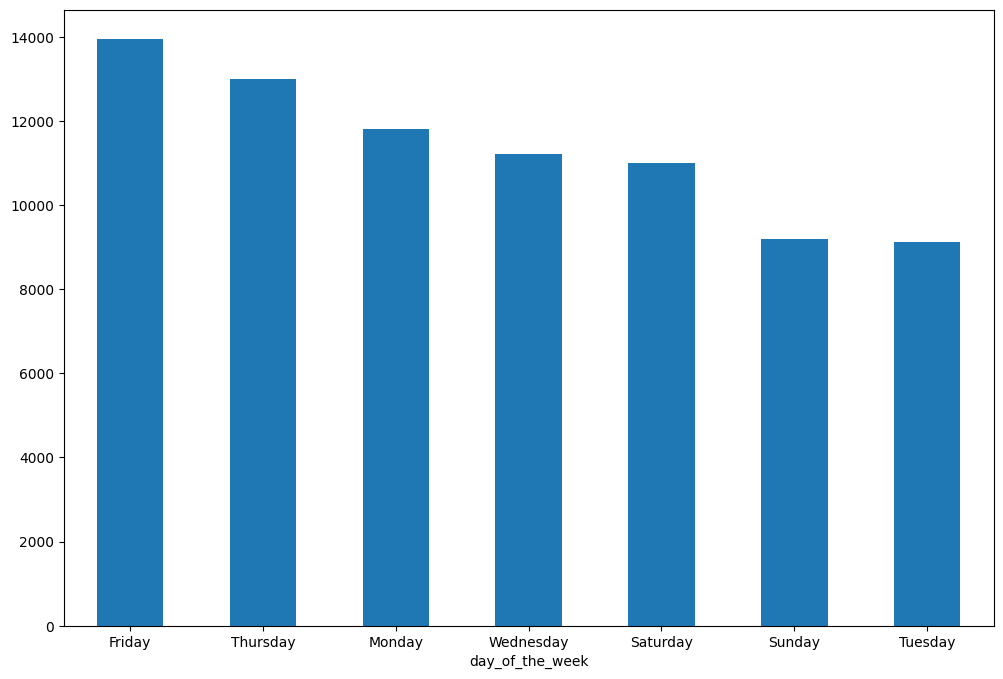

In [141]:
bookings_by_weekday_city_hotel.plot.bar(figsize=(12,8), rot=0)

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_06.png)

In [136]:
resort_hotel_bookings['datetime'] = (
    pd.to_datetime(
        resort_hotel_bookings['arrival_date_month'] + ' ' + resort_hotel_bookings['arrival_date_day_of_month'].astype(str) + ' , ' + resort_hotel_bookings['arrival_date_year'].astype(str)
    )
)

resort_hotel_bookings['day_of_the_week'] = np.vectorize(weekday)(
        resort_hotel_bookings['datetime'].dt.weekday
)

bookings_by_weekday_resort_hotel = resort_hotel_bookings.value_counts('day_of_the_week')
bookings_by_weekday_resort_hotel

/tmp/ipykernel_64089/3536435433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel_bookings['datetime'] = (
/tmp/ipykernel_64089/3536435433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel_bookings['day_of_the_week'] = np.vectorize(weekday)(


day_of_the_week
Saturday     7062
Monday       6348
Thursday     6245
Friday       5676
Sunday       4947
Wednesday    4910
Tuesday      4872
dtype: int64

| day_of_the_week |  |
| -- | -- |
| Saturday | 7062 |
| Monday | 6348 |
| Thursday | 6245 |
| Friday | 5676 |
| Sunday | 4947 |
| Wednesday | 4910 |
| Tuesday | 4872 |
_dtype: int64_

<AxesSubplot: xlabel='day_of_the_week'>

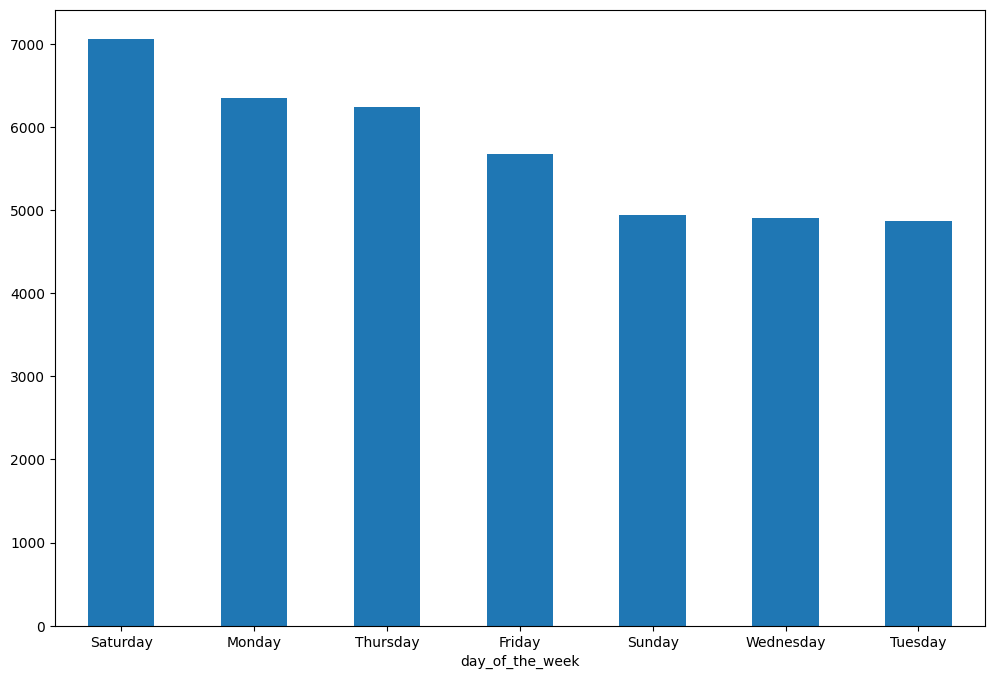

In [138]:
bookings_by_weekday_resort_hotel.plot.bar(figsize=(12,8), rot=0)

![Hotel Booking Demand Dataset](assets/hotel_booking_demand_07.png)

#### Bookings within a Date Range

In [143]:
first_15 = hotel_bookings_dropped_nan['arrival_date_day_of_month'].apply(lambda day: day in range(1,16)).sum()
first_15
# 58152

58152

In [144]:
last_15 = hotel_bookings_dropped_nan['arrival_date_day_of_month'].apply(lambda day: day in range(15,32)).sum()
last_15
# 65434

65434